In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install matplotlib pillow

EXPLORATORY DATA ANALYSIS


Exploring dataset at: /content/drive/My Drive/FARMGUARD/data/interim/maize./data
Number of classes: 4
Class: Blight, Number of samples: 1146
Class: Common_Rust, Number of samples: 1306
Class: Gray_Leaf_Spot, Number of samples: 574
Class: Healthy, Number of samples: 1162


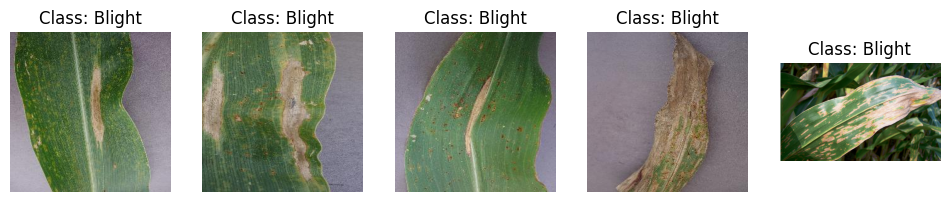

Exploring dataset at: /content/drive/My Drive/FARMGUARD/data/interim/cassava./data
Number of classes: 5
Class: Cassava___bacterial_blight, Number of samples: 1087
Class: Cassava___brown_streak_disease, Number of samples: 2189
Class: Cassava___green_mottle, Number of samples: 2386
Class: Cassava___healthy, Number of samples: 2577
Class: Cassava___mosaic_disease, Number of samples: 13158


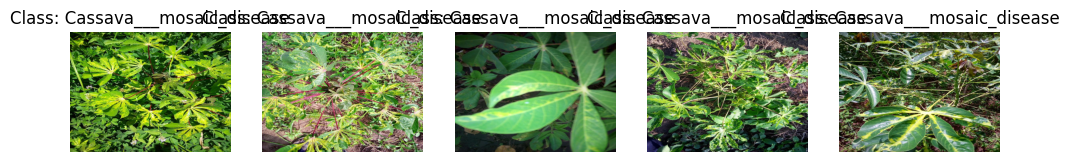

Exploring dataset at: /content/drive/My Drive/FARMGUARD/data/interim/plantdisease./PlantVillage
Number of classes: 15
Class: Pepper__bell___Bacterial_spot, Number of samples: 997
Class: Pepper__bell___healthy, Number of samples: 1478
Class: Potato___Early_blight, Number of samples: 1000
Class: Potato___Late_blight, Number of samples: 1000
Class: Potato___healthy, Number of samples: 152
Class: Tomato_Bacterial_spot, Number of samples: 2127
Class: Tomato_Early_blight, Number of samples: 1000
Class: Tomato_Late_blight, Number of samples: 1909
Class: Tomato_Leaf_Mold, Number of samples: 952
Class: Tomato_Septoria_leaf_spot, Number of samples: 1771
Class: Tomato_Spider_mites_Two_spotted_spider_mite, Number of samples: 1676
Class: Tomato__Target_Spot, Number of samples: 1404
Class: Tomato__Tomato_YellowLeaf__Curl_Virus, Number of samples: 3209
Class: Tomato__Tomato_mosaic_virus, Number of samples: 373
Class: Tomato_healthy, Number of samples: 1591


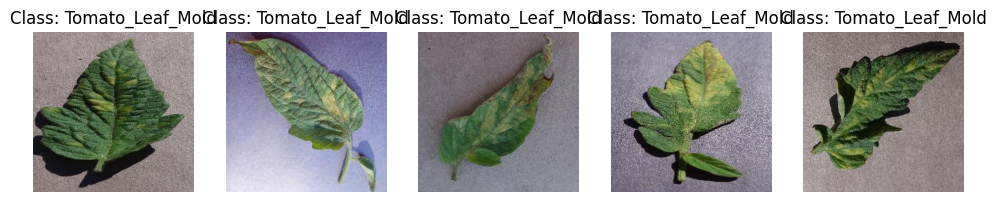

In [5]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

def explore_dataset(dataset_path, num_samples=5):
    print(f"Exploring dataset at: {dataset_path}")

    classes = os.listdir(dataset_path)
    print(f"Number of classes: {len(classes)}")

    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        if not os.path.isdir(class_path):
            continue
        print(f"Class: {class_name}, Number of samples: {len(os.listdir(class_path))}")

    # Show random samples
    sample_class = random.choice(classes)
    sample_path = os.path.join(dataset_path, sample_class)
    sample_images = random.sample(os.listdir(sample_path), min(num_samples, len(os.listdir(sample_path))))

    plt.figure(figsize=(12, 6))
    for i, image_name in enumerate(sample_images):
        image_path = os.path.join(sample_path, image_name)
        image = Image.open(image_path)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image)
        plt.title(f"Class: {sample_class}")
        plt.axis('off')
    plt.show()

explore_dataset("/content/drive/My Drive/FARMGUARD/data/interim/maize./data")
explore_dataset("/content/drive/My Drive/FARMGUARD/data/interim/cassava./data")
explore_dataset("/content/drive/My Drive/FARMGUARD/data/interim/plantdisease./PlantVillage")




DATA LOADING

In [6]:
import torch
from torchvision import datasets, transforms

def load_dataset(dataset_path, img_size=224, batch_size=32):
    transform = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
    ])

    dataset = datasets.ImageFolder(dataset_path, transform=transform)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    print(f"Loaded {len(dataset)} samples from {dataset_path}")
    return dataset, dataloader

dataset, dataloader = load_dataset("/content/drive/My Drive/FARMGUARD/data/interim/maize./data")
dataset, dataloader = load_dataset("/content/drive/My Drive/FARMGUARD/data/interim/cassava./data")
dataset, dataloader = load_dataset("/content/drive/My Drive/FARMGUARD/data/interim/plantdisease./PlantVillage")


Loaded 4188 samples from /content/drive/My Drive/FARMGUARD/data/interim/maize./data
Loaded 21397 samples from /content/drive/My Drive/FARMGUARD/data/interim/cassava./data
Loaded 20638 samples from /content/drive/My Drive/FARMGUARD/data/interim/plantdisease./PlantVillage


CLEANING AND PREPROCESSING

In [ ]:
from PIL import UnidentifiedImageError
import os

def clean_and_preprocess(dataset_path, output_path, img_size=224):

    os.makedirs(output_path, exist_ok=True)

    path = "/content/drive/MyDrive/FARMGUARD/data"
    os.makedirs(path, exist_ok=True)
    os.makedirs(os.path.join(path, "interim"), exist_ok=True)
    os.makedirs(os.path.join(path, "processed"), exist_ok=True)

    for class_name in os.listdir(dataset_path):
        output_class_path = os.path.join(output_path, class_name)
        os.makedirs(output_class_path, exist_ok=True)

        for image_name in os.listdir(os.path.join(dataset_path, class_name)):
            try:
               image_path = os.path.join(dataset_path, class_name, image_name)
               img = Image.open(image_path).convert("RGB")
               img = img.resize((img_size, img_size))
               img.save(os.path.join(output_class_path, image_name))
            except (UnidentifiedImageError, OSError):
                os.remove(image_name) 
                print(f"Removed corrupted image: {image_name}")
                

    print(f"Cleaned and preprocessed dataset saved at: {output_path}")
    return output_path



clean_and_preprocess("/content/drive/My Drive/FARMGUARD/data/interim/maize./data", "/content/drive/My Drive/FARMGUARD/data/processed/maize_clean")
clean_and_preprocess("/content/drive/My Drive/FARMGUARD/data/interim/cassava./data", "/content/drive/My Drive/FARMGUARD/data/processed/cassava_clean")
clean_and_preprocess("/content/drive/My Drive/FARMGUARD/data/interim/plantdisease./PlantVillage", "/content/drive/My Drive/FARMGUARD/data/processed/plantdisease_clean")

Cleaned and preprocessed dataset saved at: /content/drive/My Drive/FARMGUARD/data/processed/maize_clean
Cleaned and preprocessed dataset saved at: /content/drive/My Drive/FARMGUARD/data/processed/cassava_clean
Removed corrupted image: svn-r6Yb5c
Cleaned and preprocessed dataset saved at: /content/drive/My Drive/FARMGUARD/data/processed/plantdisease_clean


'/content/drive/My Drive/FARMGUARD/data/processed/plantdisease_clean'

SPLIT DATA INTO Train/Val/Test

In [22]:
from os.path import split
import shutil
import numpy as np

def split_dataset(dataset_path, output_path, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):

    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            images = os.listdir(class_path)
            np.random.shuffle(images)

            n_total = len(images)
            n_train = int(train_ratio * n_total)
            n_val = int(val_ratio * n_total)

            splits = {
                "train": images[:n_train],
                "val": images[n_train:n_train + n_val],
                "test": images[n_train + n_val:]
            }
            for split, split_imgs in splits.items():
                split_class_path = os.path.join(output_path, split, class_name)
                os.makedirs(split_class_path, exist_ok=True)

                for img in split_imgs:
                    shutil.copy(os.path.join(class_path, img), os.path.join(split_class_path, img))

    print(f"Dataset split into train/val/test sets at: {output_path}")

split_dataset("/content/drive/My Drive/FARMGUARD/data/processed/maize_clean", "/content/drive/My Drive/FARMGUARD/data/processed/maize_split")
split_dataset("/content/drive/My Drive/FARMGUARD/data/processed/cassava_clean", "/content/drive/My Drive/FARMGUARD/data/processed/cassava_split")
split_dataset("/content/drive/My Drive/FARMGUARD/data/processed/plantdisease_clean", "/content/drive/My Drive/FARMGUARD/data/processed/plantdisease_split")


Dataset split into train/val/test sets at: /content/drive/My Drive/FARMGUARD/data/processed/maize_split
Dataset split into train/val/test sets at: /content/drive/My Drive/FARMGUARD/data/processed/cassava_split
Dataset split into train/val/test sets at: /content/drive/My Drive/FARMGUARD/data/processed/plantdisease_split
